In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Improvising model's performance
 - Feature Selection
   - correlation,chi-square,annova
 - Feature extraction
   - Principal Component Analysis
 - Feature engineering
   - Create new columns,transform numerical individual columns(log,sqrt..)
 - Hyperparameters tuning
   -  

In [3]:
credit = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/credit-default.csv')

In [4]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [5]:
credit['default'].value_counts()

1    700
2    300
Name: default, dtype: int64

In [10]:
credit_dummy = pd.get_dummies(credit)
credit_dummy.shape

(1000, 62)

## PCA

In [3]:
ellipse = pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/ellipse.csv')

In [4]:
import matplotlib.pyplot as plt

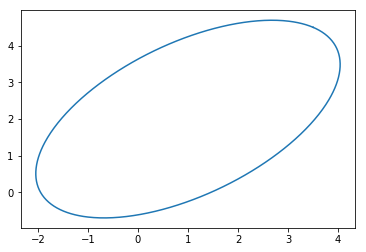

In [5]:
plt.plot(ellipse['x'],ellipse['y'])

In [6]:
 ellipse.shape

(629, 2)

In [16]:
from numpy.linalg import eig
evalue,evector=eig(ellipse.corr())

In [17]:
evalue

array([1.552432, 0.447568])

In [18]:
evector

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [19]:
from sklearn.decomposition import PCA
pc_class = PCA()

pcs=pd.DataFrame(pc_class.fit_transform(ellipse),columns=['PC1','PC2'])

pcs.head()

,PC1,PC2
0,-3.510896,-0.382795
1,-3.503481,-0.401419
2,-3.495715,-0.420003
3,-3.487598,-0.438545
4,-3.479133,-0.457043


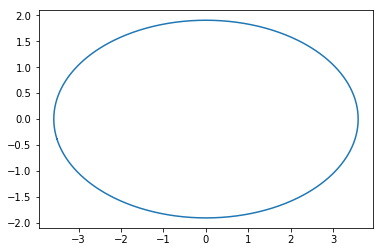

In [20]:
plt.plot(pcs['PC1'],pcs['PC2'])

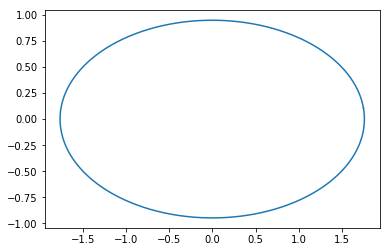

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ellipse_scaled = scaler.fit_transform(ellipse)

pcs= pd.DataFrame(np.dot(ellipse_scaled,evector),columns=['PC1','PC2'])
plt.plot(pcs['PC1'],pcs['PC2'])

In [26]:
pcs_reduced =pcs
pcs_reduced['PC2']=0
pcs_reduced.head()

,PC1,PC2
0,1.748056,0
1,1.745987,0
2,1.743744,0
3,1.741326,0
4,1.738733,0


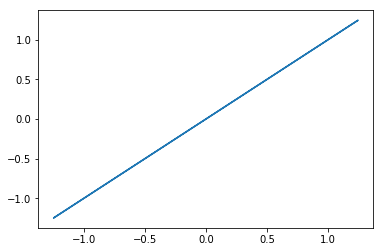

In [23]:
ellipse_recon = np.dot(pcs_reduced,np.matrix.transpose(evector))
ellipse_recon = pd.DataFrame(ellipse_recon,columns=ellipse.columns)
plt.plot(ellipse_recon['x'],ellipse_recon['y'])

In [29]:
pcs_reduced =pcs
pcs_reduced['PC1']=0
pcs_reduced.head()

,PC1,PC2
0,0,0.106163
1,0,0.115564
2,0,0.124953
3,0,0.134330
4,0,0.143694


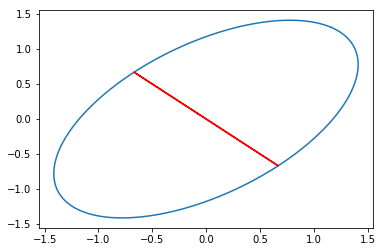

In [32]:
ellipse_recon = np.dot(pcs_reduced,np.matrix.transpose(evector))
ellipse_recon = pd.DataFrame(ellipse_recon,columns=ellipse.columns)
df_ellipse_scaled = pd.DataFrame(ellipse_scaled,columns=['x','y'])
plt.plot(df_ellipse_scaled['x'],df_ellipse_scaled['y'])
plt.plot(ellipse_recon['x'],ellipse_recon['y'],color='red')

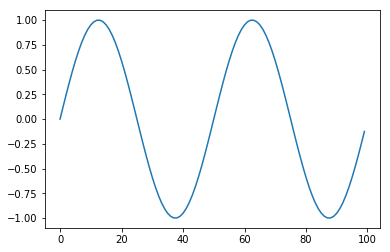

In [35]:
fs = 100 # sample rate 
f = 2 # the frequency of the signal

x = np.arange(fs) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]
plt.plot(x,y)

### Dimension Reduction

In [40]:
pcs.corr()

,PC1,PC2
PC1,1.000000e+00,5.648436e-17
PC2,5.648436e-17,1.000000e+00


- x and y uncorrelated - not linearly correlated ,non linear relationship may be there
- x and y independent - linear,non linear relationship not there

In [46]:
df=pd.DataFrame(np.random.randint(1,10,100),columns=['x'])
df['y'] = 0.2 * df['x']+10
noise = np.random.normal(5,5,100)
df['y2']=0.2 * df['x']+10+noise
df['y3']=0.2 * np.square(df['x'])+10
df['y4']=0.2 * np.sqrt(df['x'])+10
df['y5']=np.power(df['x'],5)
df.corr()

,x,y,y2,y3,y4,y5
x,1.000000,1.000000,0.170003,0.975329,0.990449,0.834879
y,1.000000,1.000000,0.170003,0.975329,0.990449,0.834879
y2,0.170003,0.170003,1.000000,0.182051,0.154549,0.154063
y3,0.975329,0.975329,0.182051,1.000000,0.936753,0.929047
y4,0.990449,0.990449,0.154549,0.936753,1.000000,0.764050
y5,0.834879,0.834879,0.154063,0.929047,0.764050,1.000000


## PCA for ml

In [47]:
credit.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [56]:
train,test =train_test_split(credit_dummy,test_size=0.3,random_state=100)
train_x= train.drop('default',axis=1)
test_x=test.drop('default',axis=1)
train_y=train['default']
test_y=test['default']

In [57]:
from sklearn.ensemble import RandomForestClassifier
ml =RandomForestClassifier(random_state=100)
ml.fit(train_x,train_y)
test_predl = ml.predict(test_x)


In [75]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(test_y,test_predl))
print(classification_report(test_y,test_predl))

0.76
             precision    recall  f1-score   support

          1       0.79      0.91      0.85       219
          2       0.60      0.35      0.44        81

avg / total       0.74      0.76      0.74       300



In [69]:
m2 = RandomForestClassifier(random_state=100)

scaler=StandardScaler()
scaler.fit(train_x)
train_x_scaled =scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)

pc_transformer=PCA()
pc_transformer.fit(train_x_scaled)
pcs_train= pc_transformer.transform(train_x_scaled)
pcs_test =pc_transformer.transform(test_x_scaled)

In [76]:
m2.fit(pcs_train,train_y)
test_pred2=m2.predict(pcs_test)
print(accuracy_score(test_y,test_pred2))
print(classification_report(test_y,test_pred2))

0.74
             precision    recall  f1-score   support

          1       0.77      0.91      0.84       219
          2       0.54      0.27      0.36        81

avg / total       0.71      0.74      0.71       300



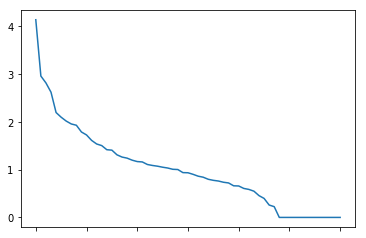

In [110]:
m3= RandomForestClassifier(random_state=100)


cols=['PC%d' % i for i in range(1,pcs_train.shape[1]+1)]

df_pcs_train=pd.DataFrame(pcs_train,columns=cols)
df_pcs_test=pd.DataFrame(pcs_test,columns=cols)
df_pcs_train.var().plot()

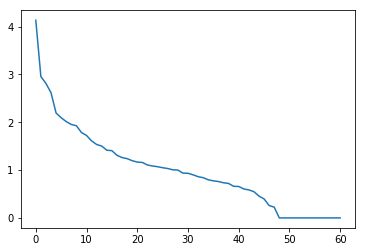

In [92]:
evalues,evectors = np.linalg.eig(pd.DataFrame(train_x_scaled).corr())
plt.plot(sorted(evalues)[::-1])

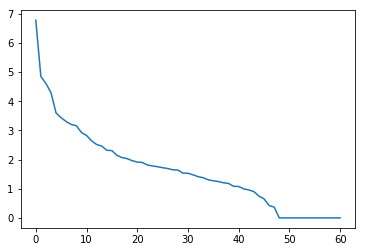

In [94]:
plt.plot(sorted(evalues/sum(evalues) * 100)[::-1])

In [97]:
cum_vars = np.cumsum(sorted(evalues/sum(evalues) * 100)[::-1])
(cum_vars<95).sum()

41

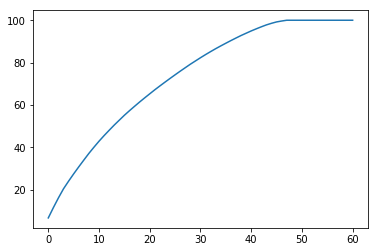

In [98]:
plt.plot(cum_vars)

In [111]:
m3 = RandomForestClassifier(random_state=100)
m3.fit(df_pcs_train.iloc[:,:41],train_y)
test_pred3 =m3.predict(df_pcs_test.iloc[:,:41])
print(accuracy_score(test_y,test_pred3))
print(classification_report(test_y,test_pred3))

0.7233333333333334
             precision    recall  f1-score   support

          1       0.76      0.90      0.83       219
          2       0.48      0.25      0.33        81

avg / total       0.69      0.72      0.69       300

